# Working with Data APIs

**Sam Maurer // DCRP PhD Student // maurer@berkeley.edu // Oct. 7, 2015 // CP 255 demo**

This notebook provides a demonstration of data-access APIs that operate over the web.

In Part 1, we'll load and parse data from an automated USGS feed of earthquakes. In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example. In Part 3, we'll use authenticated APIs to access (public) Twitter data. 

### Setup (not required until Part 3)

1. **From the command line, install this Python package for connecting to Twitter APIs:**  
   `pip install TwitterAPI`  
     
   There are several different package managers for Python. We're using "pip install" instead of "conda install" because Anaconda doesn't include this package in its index. The lab computers should already have TwitterAPI installed.  
   &nbsp;

2. **Make sure `keys.py` is in the same directory as this notebook**  
     
   `keys.py` (provided separately) contains demo authentication keys for the Twitter APIs. For folks not taking the class, you can edit the `keys-example.py` file, following the instructions in the next step to obtain your own credentials.  
   &nbsp;
   
3. **OPTIONAL: Sign up for your own Twitter API credentials (5 minutes)**  
     
   Twitter limits the number of simultaneous connections from a single account, so if you're willing to sign up for your own credentials, it will help the in-class demo go smoother!  
     
   * Log into Twitter or create an account: http://twitter.com  
     &nbsp;
     
   * Register a new app development project: https://dev.twitter.com/apps/new  
     &nbsp;  
     (The form is geared toward people making smartphone or web apps, but you still have to fill it out... You can call the app an in-class demo and give the URL of your own Twitter page, for example)  
     &nbsp;
     
   * Submit the form, go to the "Keys and Access Tokens" tab, and click on "Create my access token" at the bottom of the page  
     &nbsp;
     
   * Copy these four codes into the `keys.py` file, replacing the demo credentials:  
     (a) consumer key, (b) consumer secret, (c) access token, (d) access token secret  
     &nbsp;
     
   * All done! Try running the first few code blocks in Part 3 to see if it worked
   
----- 

-----

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data on earthquakes. Results are provided in JSON format over the web. No authentication is needed, and rather than accepting queries, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd
import urllib
import json

In [2]:
# use endpoint for magnitude 2.5+ quakes in past week
endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"

# open a connection to the URL
connection = urllib.urlopen(endpoint_url)

# download the results
results = connection.read()

print results[:500]  # first 500 characters
print type(results)

{"type":"FeatureCollection","metadata":{"generated":1444158814000,"url":"http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.0.17","count":255},"features":[{"type":"Feature","properties":{"mag":2.96,"place":"1km N of The Geysers, California","time":1444157633260,"updated":1444158221836,"tz":-420,"url":"http://earthquake.usgs.gov/earthquakes/eventpage/nc72536056","detail":"http://earthquake.usgs.gov/
<type 'str'>


In [3]:
# the results are a string with JSON-formatted data inside

# parse the string into a Python data structure
data = json.loads(results)

print data['features'][0]  # first item from the array called 'features'
print type(data)

{u'geometry': {u'type': u'Point', u'coordinates': [-122.7580032, 38.7903328, 3.56]}, u'type': u'Feature', u'properties': {u'rms': 0.06, u'code': u'72536056', u'cdi': 2, u'sources': u',nc,', u'nst': 38, u'tz': -420, u'title': u'M 3.0 - 1km N of The Geysers, California', u'magType': u'md', u'detail': u'http://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/nc72536056.geojson', u'sig': 135, u'net': u'nc', u'type': u'earthquake', u'status': u'automatic', u'updated': 1444158221836L, u'felt': 3, u'alert': None, u'dmin': 0.03405, u'mag': 2.96, u'gap': 63, u'types': u',dyfi,focal-mechanism,general-link,geoserve,nearby-cities,origin,phase-data,scitech-link,', u'url': u'http://earthquake.usgs.gov/earthquakes/eventpage/nc72536056', u'ids': u',nc72536056,', u'tsunami': 0, u'place': u'1km N of The Geysers, California', u'time': 1444157633260L, u'mmi': None}, u'id': u'nc72536056'}
<type 'dict'>


In [4]:
# pull out the event descriptions

for quake in data['features']:
    print quake['properties']['title']

M 3.0 - 1km N of The Geysers, California
M 4.6 - 43km SE of Sary-Tash, Kyrgyzstan
M 2.8 - 14km S of Volcano, Hawaii
M 2.6 - 10km SE of Chester, California
M 4.2 - 75km SW of Coquimbo, Chile
M 3.5 - 6km WSW of Perry, Oklahoma
M 2.7 - 46km W of Hawi, Hawaii
M 5.1 - 39km WNW of Illapel, Chile
M 2.7 - 3km SSE of Pole Ojea, Puerto Rico
M 4.8 - 58km SE of Ofunato, Japan
M 2.7 - 34km SSE of Redoubt Volcano, Alaska
M 5.1 - 154km SSW of Puerto El Triunfo, El Salvador
M 4.9 - 65km N of Sikabaluan, Indonesia
M 2.8 - 32km SE of Tok, Alaska
M 3.2 - 26km E of Honaunau-Napoopoo, Hawaii
M 4.5 - 122km ENE of Ndoi Island, Fiji
M 4.5 - 18km N of Taltal, Chile
M 2.9 - 66km NNW of Charlotte Amalie, U.S. Virgin Islands
M 4.7 - 89km WSW of Coquimbo, Chile
M 2.9 - 44km NE of Road Town, British Virgin Islands
M 2.6 - 8km WNW of Anza, California
M 2.7 - 9km NNW of Shelbyville, Kentucky
M 4.6 - 84km W of Illapel, Chile
M 4.2 - 70km NW of Rapar, India
M 3.9 - 135km NE of Chignik Lake, Alaska
M 2.7 - 54km ESE of L

In [5]:
# pull out magnitudes and depths into a pandas dataframe

# first, set up a dictionary of empty arrays
d = {'magnitude': [], 'depth': []}

# loop through the earthquakes and pull out datapoints
for quake in data['features']:
    d['magnitude'].append(quake['properties']['mag'])
    d['depth'].append(quake['geometry']['coordinates'][2])

# then load it all into a dataframe
df = pd.DataFrame.from_dict(d)

print len(df)

255


In [6]:
print df.head()

   depth  magnitude
0   3.56       2.96
1  25.46       4.60
2   0.73       2.82
3   2.85       2.62
4   9.02       4.20


In [7]:
print df.describe()

            depth   magnitude
count  255.000000  255.000000
mean    45.110569    3.671843
std     81.903339    0.973804
min      0.000000    2.500000
25%      9.010000    2.800000
50%     19.000000    3.300000
75%     46.015000    4.550000
max    551.360000    5.900000


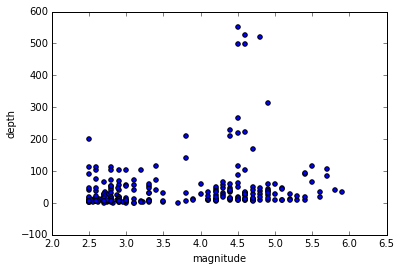

In [8]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [9]:
# save dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print 'file saved'

file saved


In [10]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print new_df.head()

   depth  magnitude
0   3.56       2.96
1  25.46       4.60
2   0.73       2.82
3   2.85       2.62
4   9.02       4.20


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google Maps has several APIs for getting search results programmatically. This one looks up latitude-longidtude coordinates (and other place information) for street addresses, which is called geocoding. 

It works similarly to the earthquakes example, with query parameters added to the URL endpoint.

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [11]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {
    'address': 'Wurster Hall, Berkeley, CA',
}

url = endpoint + '?' + urllib.urlencode(params)
print url

https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall%2C+Berkeley%2C+CA


In [12]:
# open a connection to the URL
connection = urllib.urlopen(url)

# download and parse the results
results = json.loads(connection.read())

print results

{u'status': u'OK', u'results': [{u'geometry': {u'location_type': u'ROOFTOP', u'bounds': {u'northeast': {u'lat': 37.871116, u'lng': -122.2541912}, u'southwest': {u'lat': 37.8700084, u'lng': -122.2552699}}, u'viewport': {u'northeast': {u'lat': 37.8719111802915, u'lng': -122.2533815697085}, u'southwest': {u'lat': 37.86921321970851, u'lng': -122.2560795302915}}, u'location': {u'lat': 37.8707352, u'lng': -122.2548935}}, u'address_components': [{u'long_name': u'Wurster Hall', u'types': [u'premise'], u'short_name': u'Wurster Hall'}, {u'long_name': u'Berkeley', u'types': [u'locality', u'political'], u'short_name': u'Berkeley'}, {u'long_name': u'Alameda County', u'types': [u'administrative_area_level_2', u'political'], u'short_name': u'Alameda County'}, {u'long_name': u'California', u'types': [u'administrative_area_level_1', u'political'], u'short_name': u'CA'}, {u'long_name': u'United States', u'types': [u'country', u'political'], u'short_name': u'US'}, {u'long_name': u'94720', u'types': [u'po

In [13]:
# pull out the formatted addresses

for item in results['results']:
    print item['formatted_address']

Wurster Hall, Berkeley, CA 94720, USA


# Part 3: Querying an API with authentication

### Twitter REST and Streaming APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of a connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The REST APIs perform stand-alone operations: we submit a query and receive results, like in earlier examples. The Streaming API continues sending results in real time until we disconnect.

(REST is a set of principles describing how data transactions should work over the web, while the actual communication protocol is called HTTP. Web pages work through HTTP and REST too, but the browser steps in to interpret and display the content for you.)

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/streaming/overview

**Documentation for third-party Python "wrapper"**:  
https://github.com/geduldig/TwitterAPI

In [14]:
from TwitterAPI import TwitterAPI

In [15]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [16]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print "Connection is set up but not tested"

Connection is set up but not tested


### Making a simple data request

In [17]:
# Most recent tweet from @GBoeing's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'gboeing', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print tweet['text']

Can the Bay Area house everyone who wants to live there without altering its character? Yes. https://t.co/jalpboUz9y http://t.co/rtQz8leoEC


In [18]:
# What other data is there?

print tweet.keys()

[u'contributors', u'truncated', u'text', u'is_quote_status', u'in_reply_to_status_id', u'id', u'favorite_count', u'source', u'retweeted', u'coordinates', u'entities', u'in_reply_to_screen_name', u'id_str', u'retweet_count', u'in_reply_to_user_id', u'favorited', u'user', u'geo', u'in_reply_to_user_id_str', u'possibly_sensitive', u'lang', u'created_at', u'in_reply_to_status_id_str', u'place', u'extended_entities']


In [19]:
# Contents of some additional fields...
# Here are the definitions: https://dev.twitter.com/overview/api/tweets

for tweet in r.get_iterator():
    print "Tweet      // ", tweet['text']
    print "Timestamp  // ", tweet['created_at']
    print "Retweets   // ", tweet['retweet_count']
    print "Favorites  // ", tweet['favorite_count']
    print "Geotag     // ", tweet['coordinates']
    print "Language   // ", tweet['lang']
    print "User       // ", tweet['user']['screen_name']
    print "Followers  // ", tweet['user']['followers_count']
    print "Profile    // ", tweet['user']['description']

Tweet      //  Can the Bay Area house everyone who wants to live there without altering its character? Yes. https://t.co/jalpboUz9y http://t.co/rtQz8leoEC
Timestamp  //  Tue Oct 06 19:13:33 +0000 2015
Retweets   //  0
Favorites  //  0
Geotag     //  None
Language   //  en
User       //  gboeing
Followers  //  1676
Profile    //  PhD candidate in urban planning at @UCBerkeley. Cities, complexity, livability, urban design, data.


### Other API endpoints allow different types of searches

In [20]:
# Search for public tweets about #muni

endpoint = 'search/tweets'
params = {
    'q': '#muni', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print tweet['text'] + '\n'

Dear #Muni:  You always wreak of mothballs.  I'm afraid to ask what the source may be...

RT @sfexaminer: Governor signs bus-camera ticketing bill, #Muni to target double parkers
http://t.co/fadMGLCos6 http://t.co/agz3xYFsAy

Hey #Muni!!  What did you do?  Lol lol.  The things us suburban gals get amused by.

New Jim Colby video on #Fed’s September hike delay and Puerto Rico default: http://t.co/cyjhi9I8qX #muni #bonds http://t.co/SUrgQgR0hz

RT @Scott_Wiener: Kicking off new campaign to put #art on #Muni buses. The 5 winning artists did a great job beautifying our #transit. http…



In [21]:
# Search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print tweet['text'] + '\n'

Sheesh

RT @sardanarohit: जब घर में हैं आज़म खान, तो क्यों चाहिए पाकिस्तान? 
https://t.co/JoZrUYGBDs

Makkah Mina vipathil, Ilankayar oruvar maranam.

गंगा माता बिलख रही थी लाचारी के घाटों पर,
क्रूर लाठियां बरस रही थीं चन्दन लगे ललाटों पर,

RT @rverma1080: सत्य परेशान हो सकता है लेकिन पराजित नहीं हो सकता।। http://t.co/dXjMyyIIFq



In [22]:
# Search for public tweets geotagged near the UC Berkeley campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '37.873,-122.260,0.5km', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print tweet['text'] + '\n'

Classes! (@ South Hall - @cal in Berkeley, CA) https://t.co/1EMp7qMgU0

The new Lower Sproul Plaza and Eshleman Hall, by Moore Ruble Yudell Architects--already very popular… https://t.co/hooRcLhRA5

I'm at University of California, Berkeley - @cal in Berkeley, CA https://t.co/rQBd4E0woh

Morning #meditation.
And laundry.
#dormlife #theearlybirdgetsthedryer  #GradSchool #GottaGetItAllDone… https://t.co/w5q1Iyieh0

hey is this avant-garde @ UC Berkeley https://t.co/xqGnhy58s4



### Exercise

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text
3. Advanced: can you figure out how to use the API to *post* a tweet?

Here's the search documentation: https://dev.twitter.com/rest/reference/get/search/tweets




### Streaming live tweets in real time 

In [24]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print tweet['created_at']
    print tweet['place']['full_name'] + ', ' + tweet['place']['country']
    print tweet['text'] + '\n'
    if (i > 20): break

r.close()  # close streaming connection

Tue Oct 06 19:16:53 +0000 2015
Manaus, Amazonas, Brasil
SHAJSJAKDKSKDK

Tue Oct 06 19:16:53 +0000 2015
Yemen, Yemen
@M8pnE @motalka_m7roma انا زبي قام وصل

Tue Oct 06 19:16:53 +0000 2015
Quinta de Tilcoco, Chile, Chile
@sacaloprendio he pecado, el ego es incontrolable: la estadística es sólo en Santiago..
http://t.co/xGrRhmBBcs
Me flagelo

Tue Oct 06 19:16:54 +0000 2015
Paris, Ile-de-France, France
I can't tell you how beautiful this blue is. You just have to go see it. #YvesKlein @ Centre Pompidou https://t.co/imzJavALCg

Tue Oct 06 19:16:54 +0000 2015
Italia, Italia
Una que me baile Twerk

Tue Oct 06 19:16:54 +0000 2015
Salwa, Kuwait, دولة الكويت
اللهم اني اسالك ان اتخرج من الثانوي بكامل قواي العقليه .

Tue Oct 06 19:16:53 +0000 2015
Norway, Norge
@PatrickJD84 @CaribbeanChilly @Grummz and my talents http://t.co/i5WKRSOziR

Tue Oct 06 19:16:54 +0000 2015
京都府 京都市 伏見区, 日本
きつねかわいい！！！（2243回目）

Tue Oct 06 19:16:53 +0000 2015
Oaxaca de Juárez, Oaxaca, México
En Semifinales el #TorneoIntramu

AttributeError: 'TwitterResponse' object has no attribute 'close'

### Loading tweets into a dataframe

In [26]:
# first, save some tweets to an array instead of just printing them

r = api.request(endpoint, params)
tweets = []

for i, tweet in enumerate(r.get_iterator()):
    if (i >= 500): break
    tweets.append(tweet)

r.close()
print len(tweets)

AttributeError: 'TwitterResponse' object has no attribute 'close'

In [27]:
# the raw data is very messy though!

print tweets[0:5]

[{u'contributors': None, u'truncated': False, u'text': u'@thomasbernardes \xe9 sim', u'is_quote_status': False, u'in_reply_to_status_id': 651476149676212224L, u'id': 651476328290627584L, u'favorite_count': 0, u'source': u'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', u'retweeted': False, u'coordinates': None, u'timestamp_ms': u'1444159035166', u'entities': {u'user_mentions': [{u'id': 39062231, u'indices': [0, 16], u'id_str': u'39062231', u'screen_name': u'thomasbernardes', u'name': u'schaeffer'}], u'symbols': [], u'hashtags': [], u'urls': []}, u'in_reply_to_screen_name': u'thomasbernardes', u'id_str': u'651476328290627584', u'retweet_count': 0, u'in_reply_to_user_id': 39062231, u'favorited': False, u'user': {u'follow_request_sent': None, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 3027528856L, u'verified': False, u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/628396788584710144/E9w5oCAa_normal.jpg', u'profil

In [28]:
# we'll pull out some pieces into a dataframe

# first, set up a dictionary of empty arrays
d = {'place': [], 'latitude': [], 'longitude': []}

for t in tweets:
    try:
        # first check whether the fields we want exist
        _test = t['coordinates']['coordinates']
        
        # then pull out the data
        d['place'].append(t['place']['name'])
        d['latitude'].append(t['coordinates']['coordinates'][1])
        d['longitude'].append(t['coordinates']['coordinates'][0])
        
    except:
        # if the test failed, continue to next tweet
        continue

# load it into a dataframe
df = pd.DataFrame.from_dict(d)

print len(df)

80


In [29]:
print df.head()

    latitude   longitude         place
0  -8.080211  -34.941551        Recife
1  41.432544   33.771574     Kastamonu
2   3.094285  103.085270         Bebar
3  39.091116  -94.415507  Independence
4  34.967096  135.772691       京都市 伏見区


In [30]:
print df.sort('place').head(12)

     latitude   longitude       place
21  41.007700   39.617398    Akçaabat
64  32.930000 -111.580000     Arizona
45  29.274240   47.932065   Ashbeliah
17  39.330337   26.663693     Ayvalık
2    3.094285  103.085270       Bebar
34  42.347485  -71.076020      Boston
69 -15.783500  -47.899164    Brasília
26  51.454582   -2.598296     Bristol
9   51.505778   -0.099747  Camberwell
14  44.861972  -93.571570  Chanhassen
36   3.736233  -75.423942   Chaparral
16  36.810974 -119.713646      Clovis


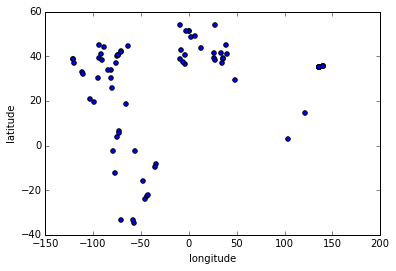

In [31]:
df.plot(x='longitude', y='latitude', kind='scatter')

In [32]:
# Note that when working with text strings that include characters from 
# other alphabets, you need to keep track of the text encoding.

# Some interesting related reading:
# - http://www.joelonsoftware.com/articles/Unicode.html

df.to_csv('saved_coords.csv', encoding='utf-8')

### Exercise for the remainder of class

Choose one:

1. Using one of the APIs from this demo, save and graph a different aspect of the data.  
   &nbsp;

2. Or, search the web for another API that provides data you're interested in. Can you figure out how to connect to it using Python code?

Some common terms for describing these APIs that operate over the web are "HTTP" and "REST". The most frequent data format they provide is JSON, but with some code modifications you can parse other formats as well.